<a href="https://colab.research.google.com/github/BerlinRKP/Kelas-Mahir-Pejuang-Data-2.0/blob/main/Tugas_B4P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Mengakses dataset

In [239]:
df = pd.read_csv('https://raw.githubusercontent.com/BerlinRKP/Kelas-Mahir-Pejuang-Data-2.0/main/weatherAUS.csv')
df.head() 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,No


Data dapat dipisahkan dengan pembatas ";" dalam suatu kumpulan data tertentu

### Tujuan analisis data 
Melakukan klasifikasi penumpang yang selamat dan tidak selamat pada kasus tenggelamnya kapal Titanic.

### Memahami dataset

Dataset Titanic dibuat untuk membuat machine learning untuk melakukan klasifikasi biner(Selamat atau Tidak Selamat. Variabel-variabel yang terdapat pada dataset ini adalah sebagai berikut:
1. **PassengerId** = Nomor Id Penumpang 
2. **Survived** = Keterangan Selamat(0=Tidak, 1=Ya)
3. **Pclass** = Kelas Tiket (1=Kelas 1, 2=Kelas 2, dst)
4. **Name** = Nama Penumpang
5. **Sex** = Jenis kelamin
6. **Age** = Usia dalam tahun
7. **SibSp** = Jumlah saudara kandung / pasangan di kapal Titanic
8. **Parch** = Jumlah orang tua / anak di kapal Titanic
9. **Ticket** = Nomor Tiket
10. **Fare** = Harga Tiket
11. **Cabin** = Nama Kabin
12. **Embarked** = Pelabuhan Asal (C = Cherbourg, Q = Queenstown, S = Southampton)

#**Eksploratory Data Analysis**

### Dimensi Data

In [201]:
df.shape

(145460, 23)

Artinya kita memiliki data dengan 23 kolom dan 145460 baris dimana dataset tersebut terdiri dari 145460 observasi dan 23 karakteristik


### Variabel Pada Dataset

In [202]:
df.columns.values 

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

Melabeli setiap kolom sesuai dengan ketetuan dataset, dimana terdapat 23 variabel


In [203]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm       object
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [204]:
df['Pressure3pm']=pd.to_numeric(df['Pressure3pm'],errors='coerce')

Data hanya memiliki type float dan object pada data yang ada dalam variabel setiap dataset



In [205]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130430 non-null  float64
 17  Cloud9am       89572 non-null

Kita dapat mengetahui tipe-tipe data masing-masing variabel dan nama-nama variabel dalam dataset

### Mengecek Missing Data

In [206]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15030
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Data diatas yang tidak memiliki missing data yaitu pada variabel date dan location

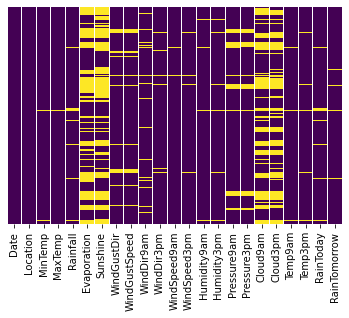

In [207]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Mengecek Outlier

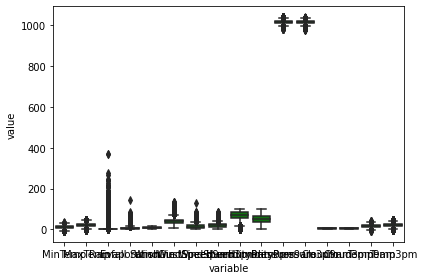

In [208]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()


### Melihat Korelasi Data

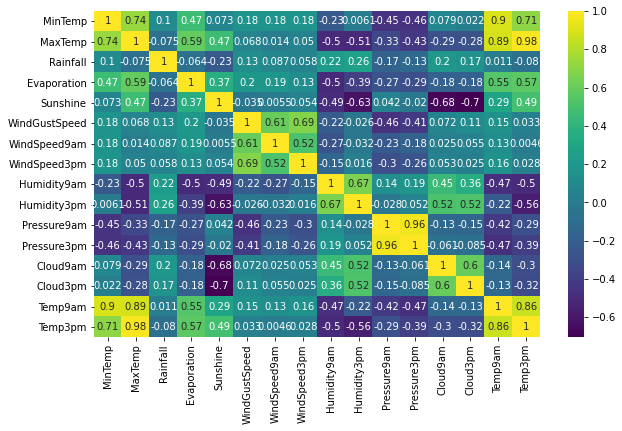

In [209]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Warna kuning mewakili korelasi positif sedangkan warna selain kuning mewakili korelasi negatif.

### Melihat Statistik Data

In [210]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130430.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255921,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037449,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Menunjukan rangkuman statistika seperti nilai rata-rata, minimum, maksium

### Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

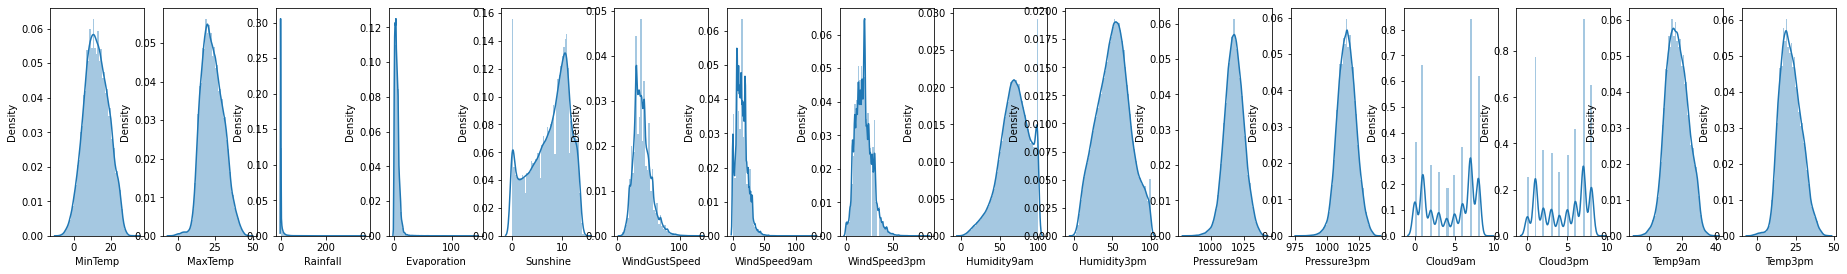

In [211]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

Plot ini untuk melihat apakah variabel-variabel pada dataset berdistribusi normal. 



#**Data Preprocessing**

Data preprocessing ini digunakan guna menyiapkan data untuk diklasifikasi menggunakan metode SVM(Hanya Contoh).

Setelah mengetahui hasil EDA di atas maka untuk hasil yang baik diperlukan beberapa hal sebagai berikut:
1. Menghapus kolom teks yang tidak diperlukan: **Name** dan **Ticket**
2. Mengisi NaN pada kolom **Cabin** dengan salah satu nama kabin tertentu*, mengisi NaN pada kolom **Age **dengan nilai rata-ratanya
3. Melakukan pengkodean(Encoding) pada kolom **Sex** , **Cabin**, dan **Embarked**
4. Menghapus outlier
5. Karena nilai data ada yang sangat besar dan kecil maka perlu dilakukan normalisasi

Setelah data diperbaiki dilakukan langkah sebagai berikut:
1. Memilih variabel independent dan label
2. Membagi data menjadi data training dan data testing


[Note] * Ini hanya contoh untuk melakukan pengisian data NaN(Kosong), nama kabin mungkin menjadi penting sehingga tidak segampang itu diganti

### Seleksi Kolom

In [212]:
df=df.drop(columns=['Date', 'Location', 'RainTomorrow'])
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


### Mengisi NaN

In [213]:
df['WindGustDir'] = df['WindGustDir'].replace(np.nan, "WN")
df['WindDir9am'] = df['WindDir9am'].replace(np.nan, "WIN")
df['WindDir3pm'] = df['WindDir3pm'].replace(np.nan, "WD")
df['RainToday'] = df['RainToday'].replace(np.nan, "N")
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [214]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No
1,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No
2,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No
3,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No
4,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No


In [215]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

### Melakukan Pengkodean(Encoding)
Mengubah konversi informasi dari suatu objek ke suatu data


In [216]:
#Encoding data dengan kategori sangat banyak
df["WindGustDir"] = df["WindGustDir"].astype('category')
df["WindDir9am"] = df["WindDir9am"].astype('category')
df["WindDir3pm"] = df["WindDir3pm"].astype('category')
df["RainToday"] = df["RainToday"].astype('category')
df.dtypes

MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir      category
WindGustSpeed     float64
WindDir9am       category
WindDir3pm       category
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday        category
dtype: object

In [217]:
df["WindGustDir"] = df["WindGustDir"].cat.codes
df["WindDir9am"] = df["WindDir9am"].cat.codes
df["WindDir3pm"] = df["WindDir3pm"].cat.codes
df["RainToday"] = df["RainToday"].cat.codes
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,15,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,1
1,7.4,25.1,0.0,5.468232,7.611178,15,44.0,6,16,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,1
2,12.9,25.7,0.0,5.468232,7.611178,16,46.0,13,16,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,1
3,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,1
4,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,1


Referensi Encoding Lengkap:
https://pbpython.com/categorical-encoding.html

### Menghapus Outlier

Outlier adalah data yang berbeda dari data lainnya


Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

Referensi: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

In [218]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

MinTemp           9.100000
MaxTemp          10.200000
Rainfall          1.000000
Evaporation       1.468232
Sunshine          1.088822
WindGustDir       9.000000
WindGustSpeed    15.000000
WindDir9am        9.000000
WindDir3pm        8.000000
WindSpeed9am     12.000000
WindSpeed3pm     11.000000
Humidity9am      26.000000
Humidity3pm      28.000000
Pressure9am       8.300000
Pressure3pm       8.300000
Cloud9am          3.000000
Cloud3pm          2.000000
Temp9am           9.200000
Temp3pm           9.500000
RainToday         0.000000
dtype: float64


In [219]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.900000,0.6,5.468232,7.611178,13,44.00000,13,15,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,1
1,7.4,25.100000,0.0,5.468232,7.611178,15,44.00000,6,16,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,1
2,12.9,25.700000,0.0,5.468232,7.611178,16,46.00000,13,16,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,1
3,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,1
4,17.5,32.300000,1.0,5.468232,7.611178,13,41.00000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.468232,7.611178,0,31.00000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,1
145456,3.6,25.300000,0.0,5.468232,7.611178,6,22.00000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,1
145457,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,9,15,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,1
145458,7.8,27.000000,0.0,5.468232,7.611178,9,28.00000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,1


### Normalisasi Data

Normalisasi perlu dilakukan untuk tujuan menghilangkan dan mengurangi redudansi data dan tujuan yang kedua adalah memastikan dependensi data (Data berada pada tabel yang tepat)




In [220]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.534626,0.493857,0.6,0.632454,0.374692,0.8125,0.603448,0.8125,0.9375,0.540541,0.615385,0.646341,0.212121,0.199396,0.253776,0.888889,0.501419,0.504132,0.509235,0.0
1,0.368421,0.547912,0.0,0.632454,0.374692,0.9375,0.603448,0.3750,1.0000,0.108108,0.564103,0.317073,0.242424,0.287009,0.274924,0.494162,0.501419,0.512397,0.575198,0.0
2,0.520776,0.562654,0.0,0.632454,0.374692,1.0000,0.637931,0.8125,1.0000,0.513514,0.666667,0.243902,0.292929,0.196375,0.302115,0.494162,0.142857,0.617080,0.546174,0.0
3,0.418283,0.619165,0.0,0.632454,0.374692,0.2500,0.258621,0.5625,0.0000,0.297297,0.230769,0.329268,0.151515,0.498489,0.425982,0.494162,0.501419,0.537190,0.633245,0.0
4,0.648199,0.724816,1.0,0.632454,0.374692,0.8125,0.551724,0.0625,0.4375,0.189189,0.512821,0.780488,0.323232,0.293051,0.220544,0.777778,1.000000,0.528926,0.717678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60662,0.240997,0.506143,0.0,0.632454,0.374692,0.0000,0.379310,0.5625,0.0625,0.351351,0.282051,0.402439,0.232323,0.709970,0.652568,0.494162,0.501419,0.316804,0.525066,0.0
60663,0.263158,0.552826,0.0,0.632454,0.374692,0.3750,0.224138,0.5625,0.1875,0.351351,0.230769,0.463415,0.202020,0.676737,0.616314,0.494162,0.501419,0.338843,0.580475,0.0
60664,0.313019,0.592138,0.0,0.632454,0.374692,0.1875,0.482759,0.5625,0.9375,0.243243,0.230769,0.426829,0.232323,0.601208,0.546828,0.494162,0.501419,0.382920,0.622691,0.0
60665,0.379501,0.594595,0.0,0.632454,0.374692,0.5625,0.327586,0.6250,0.1875,0.351351,0.179487,0.402439,0.232323,0.552870,0.537764,0.333333,0.142857,0.454545,0.620053,0.0


### Memilih Variable Target & Variabel Independent

In [221]:
y=df_clear['RainToday']
X=df_clear.drop(columns=['RainToday'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[1 1 1 ... 1 1 1]
[[13.4        22.9         0.6        ...  4.50993008 16.9
  21.8       ]
 [ 7.4        25.1         0.         ...  4.50993008 17.2
  24.3       ]
 [12.9        25.7         0.         ...  2.         21.
  23.2       ]
 ...
 [ 5.4        26.9         0.         ...  4.50993008 12.5
  26.1       ]
 [ 7.8        27.          0.         ...  2.         15.1
  26.        ]
 [14.9        23.22134828  0.         ...  8.         15.
  20.9       ]]


### Membagi Data Menjadi Data Training dan Data Testing

In [222]:
y = df.RainToday.values
x_data = df.drop(['RainToday'], axis = 1)

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5,random_state=80)

x_train, x_test, y_train, y_test = train_test_split(x, y)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

#**Perhitungan KNN Dengan Scikit Learn**#

In [223]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 77.49%


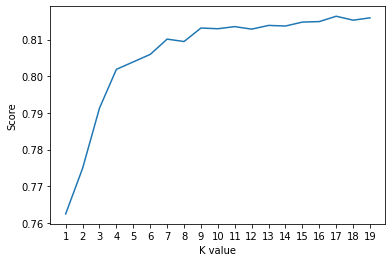

Maksimum nilai KNN adalah 81.64%


In [224]:
#Mencari nilai k yang terbaik
accuracies = {}
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maksimum nilai KNN adalah {:.2f}%".format(acc))

### Matrik Konfusi KNN

In [225]:
#Membuat matriks dari nilai sebenarnya dan nilai prediksi
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[  289,   481,    57],
       [  820, 25594,  1089],
       [  292,  5448,  2295]])

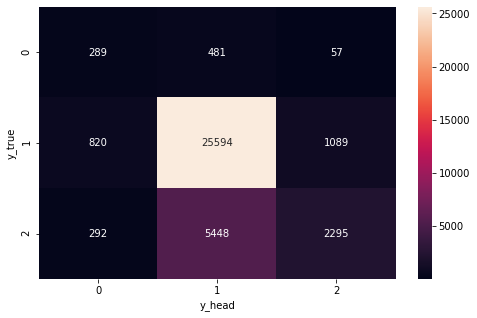

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

#**Perhitungan NB Dengan Scikit Learn**#

In [227]:
#Melihat akurasi
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

prediction_nb = nb.predict(x_test.T)
acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Akurasi Naive Bayes: {:.2f}%".format(acc))

Akurasi Naive Bayes: 95.72%


### Matrik Konfusi NB

In [228]:
#Membuat matriks dari nilai sebenarnya dan nilai prediksi
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[  289,   481,    57],
       [  820, 25594,  1089],
       [  292,  5448,  2295]])

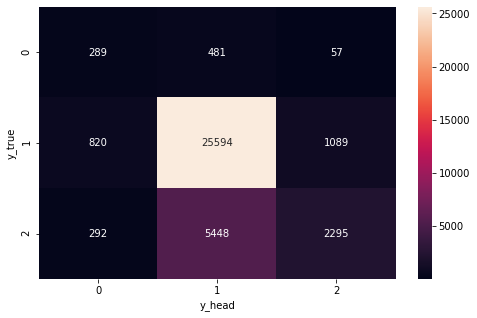

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

#**Perhitungan Random Forest Classifier Dengan Scikit Learn**#

In [235]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 99.97%


#**Perhitungan SVM Dengan Scikit Learn**#

In [236]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 89.48%


#**Perhitungan Multi Layer Perceptron Dengan Scikit Learn**#

In [240]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
MLPC.fit(x_train.T, y_train.T)

acc = MLPC.score(x_test.T,y_test.T)*100

accuracies['MLPC'] = acc
print("MLP Accuracy Score : {:.2f}%".format(acc))

MLP Accuracy Score : 75.63%


#**Perhitungan Linier Discriminant Analysis Dengan Scikit Learn**#

In [242]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train.T, y_train.T)
acc = lda.score(x_test.T,y_test.T)*100

accuracies['LDA'] = acc
print("LDA Accuracy Score : {:.2f}%".format(acc))

LDA Accuracy Score : 85.57%
